In [76]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Load the athlete data
athlete_df = pd.read_csv('..\Resources\Cleaning2\merged_events_bio.csv')
# drop unused columns
athlete_df= athlete_df.drop(['Athlete_ID', 'Name', 'Country_Name', 'Season', 'Result_ID'],1)
athlete_df.head()

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Age,Sex,Height(cm),Weight(kg),Sport,Country_Code,Year,isTeamSport,Medal
0,21.0,M,NaN,NaN,Cycling Road,HUN,1912,False,na
1,21.0,M,NaN,NaN,Cycling Road,HUN,1912,True,na
2,29.0,M,173.0,72.0,Shooting,POL,1976,False,na
3,21.0,F,170.0,50.0,Swimming,SUI,1992,False,na
4,21.0,F,170.0,50.0,Swimming,SUI,1992,False,na


In [78]:
# Load the GDP data
gdp_df = pd.read_csv('..\Resources\gdp_pop_medals\gpd_medals_total.csv')
# drop unused columns
gdp_df = gdp_df.drop(['Season','Country_Name','Gold','Silver','Bronze','Total_Medals'],1)
gdp_df.head()

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Country_Code,Year,GDP
0,ARG,1960,NaN
1,AUS,1960,1810.510249
2,AUT,1960,935.460427
3,AUT,1960,935.460427
4,BEL,1960,1273.691659


In [79]:
# Load the population data
population_df = pd.read_csv('..\Resources\gdp_pop_medals\pop_medals_total.csv')
# drop unused columns
population_df = population_df.drop(['Season','Country_Name','Gold','Silver','Bronze','Total_Medals'],1)
population_df.head()

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Country_Code,Year,Population
0,ARG,1960,20349744.0
1,AUS,1960,10276477.0
2,AUT,1960,7047539.0
3,AUT,1960,7047539.0
4,BEL,1960,9153489.0


In [80]:
world_population_df = pd.read_csv('WorldPop.csv')
world_population_df = world_population_df.drop(['Yearly Change','Net Change','Density (P/Km²)'],1)
world_population_df.head()

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Year,World Population
0,2020,7794798739
1,2019,7713468100
2,2018,7631091040
3,2017,7547858925
4,2016,7464022049


In [81]:
# Merge the data into one dataframe
result = []
result = pd.merge(athlete_df, gdp_df, how='left', on=["Country_Code", "Year"])
result = pd.merge(result, population_df, how='left', on=["Country_Code", "Year"])
result = pd.merge(result, world_population_df, how='left', on=["Year"])
result

,Age,Sex,Height(cm),Weight(kg),Sport,Country_Code,Year,isTeamSport,Medal,GDP,Population,World Population
0,21.0,M,NaN,NaN,Cycling Road,HUN,1912,False,na,NaN,NaN,NaN
1,21.0,M,NaN,NaN,Cycling Road,HUN,1912,True,na,NaN,NaN,NaN
2,29.0,M,173.0,72.0,Shooting,POL,1976,False,na,NaN,34356300.0,4.154667e+09
3,21.0,F,170.0,50.0,Swimming,SUI,1992,False,na,NaN,NaN,5.498920e+09
4,21.0,F,170.0,50.0,Swimming,SUI,1992,False,na,NaN,NaN,5.498920e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
418189,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,16112.18892,39157685.0,5.498920e+09
418190,31.0,M,190.0,76.0,Fencing,ESP,1996,True,na,16109.08440,39889852.0,5.824892e+09
418191,21.0,M,170.0,64.0,Athletics,JPN,1912,False,na,NaN,NaN,NaN
418192,29.0,M,170.0,64.0,Athletics,JPN,1920,False,na,NaN,NaN,NaN


In [82]:
# find amount of NaN values
result.isna().sum()

Age                   6356
Sex                      0
Height(cm)           95767
Weight(kg)          101792
Sport                    0
Country_Code             0
Year                     0
isTeamSport              0
Medal                    0
GDP                 171385
Population          157746
World Population     57523
dtype: int64

In [83]:
# drop NaN values in the following columns
# result = result.dropna(subset=['Height(cm)', 'Weight(kg)', 'Age', 'Population'])
result = result.dropna()
result

,Age,Sex,Height(cm),Weight(kg),Sport,Country_Code,Year,isTeamSport,Medal,GDP,Population,World Population
7,24.0,M,203.0,100.0,Rowing,USA,2016,True,na,57866.744930,323071755.0,7.464022e+09
8,28.0,M,203.0,100.0,Rowing,USA,2020,True,na,63530.633480,331501080.0,7.794799e+09
9,22.0,M,181.0,80.0,Rowing,JPN,1964,True,na,843.616878,96903000.0,3.273978e+09
11,25.0,M,165.0,51.0,Athletics,UGA,1972,False,na,137.025218,10885563.0,3.851650e+09
12,23.0,F,162.0,58.0,Diving,JPN,1972,False,na,2967.041996,107188000.0,3.851650e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
418186,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,16112.188920,39157685.0,5.498920e+09
418187,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,16112.188920,39157685.0,5.498920e+09
418188,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,16112.188920,39157685.0,5.498920e+09
418189,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,16112.188920,39157685.0,5.498920e+09


In [84]:
# find amount of NaN values remaining
result.isna().sum()

Age                 0
Sex                 0
Height(cm)          0
Weight(kg)          0
Sport               0
Country_Code        0
Year                0
isTeamSport         0
Medal               0
GDP                 0
Population          0
World Population    0
dtype: int64

In [85]:
# fill the GDP column's NaN values with 0 to avoid losing more data. Need to evaluate if dropping is a beeter option. 
# result['GDP'] = result['GDP'].fillna(0)
# result.isna().sum()

In [86]:
result['GDP'] = result['GDP']*result['Population']
result['%_of_World_Pop'] = result['Population']/result['World Population']
result

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Sex,Height(cm),Weight(kg),Sport,Country_Code,Year,isTeamSport,Medal,GDP,Population,World Population,%_of_World_Pop
7,24.0,M,203.0,100.0,Rowing,USA,2016,True,na,1.869511e+13,323071755.0,7.464022e+09,0.043284
8,28.0,M,203.0,100.0,Rowing,USA,2020,True,na,2.106047e+13,331501080.0,7.794799e+09,0.042528
9,22.0,M,181.0,80.0,Rowing,JPN,1964,True,na,8.174901e+10,96903000.0,3.273978e+09,0.029598
11,25.0,M,165.0,51.0,Athletics,UGA,1972,False,na,1.491597e+09,10885563.0,3.851650e+09,0.002826
12,23.0,F,162.0,58.0,Diving,JPN,1972,False,na,3.180313e+11,107188000.0,3.851650e+09,0.027829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418186,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,6.309160e+11,39157685.0,5.498920e+09,0.007121
418187,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,6.309160e+11,39157685.0,5.498920e+09,0.007121
418188,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,6.309160e+11,39157685.0,5.498920e+09,0.007121
418189,27.0,M,190.0,76.0,Fencing,ESP,1992,True,na,6.309160e+11,39157685.0,5.498920e+09,0.007121


In [87]:
print("Number of rows:", result.shape[0])

Number of rows: 219096


In [88]:
# Convert the following columns to binary values. Gold, Silver, and Bronze metals will all be consdered a 1.
result['Sex'] = result['Sex'].map({'M':1, 'F':0})
result['isTeamSport'] = result['isTeamSport'].map({True:1, False:0})
result['Medal'] = result['Medal'].map({'Gold':1, 'Silver':1, 'Bronze':1, 'na':0})
result

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Age,Sex,Height(cm),Weight(kg),Sport,Country_Code,Year,isTeamSport,Medal,GDP,Population,World Population,%_of_World_Pop
7,24.0,1,203.0,100.0,Rowing,USA,2016,1,0,1.869511e+13,323071755.0,7.464022e+09,0.043284
8,28.0,1,203.0,100.0,Rowing,USA,2020,1,0,2.106047e+13,331501080.0,7.794799e+09,0.042528
9,22.0,1,181.0,80.0,Rowing,JPN,1964,1,0,8.174901e+10,96903000.0,3.273978e+09,0.029598
11,25.0,1,165.0,51.0,Athletics,UGA,1972,0,0,1.491597e+09,10885563.0,3.851650e+09,0.002826
12,23.0,0,162.0,58.0,Diving,JPN,1972,0,0,3.180313e+11,107188000.0,3.851650e+09,0.027829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418186,27.0,1,190.0,76.0,Fencing,ESP,1992,1,0,6.309160e+11,39157685.0,5.498920e+09,0.007121
418187,27.0,1,190.0,76.0,Fencing,ESP,1992,1,0,6.309160e+11,39157685.0,5.498920e+09,0.007121
418188,27.0,1,190.0,76.0,Fencing,ESP,1992,1,0,6.309160e+11,39157685.0,5.498920e+09,0.007121
418189,27.0,1,190.0,76.0,Fencing,ESP,1992,1,0,6.309160e+11,39157685.0,5.498920e+09,0.007121


In [89]:
# dropping columns unimportant to machine learning.
# dropping sport column for now to simplify first pass. need to find a good way to utilize.
result = result.drop(['Sport','Country_Code','Population','World Population'],1)

C:\Users\Public\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
# Print the names of the new columns
print(result.columns)

Index(['Age', 'Sex', 'Height(cm)', 'Weight(kg)', 'Year', 'isTeamSport',
       'Medal', 'GDP', '%_of_World_Pop'],
      dtype='object')


In [91]:
# Split the data into features and target
X = result.drop('Medal', axis=1)
y = result['Medal']

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from collections import Counter
Counter(y_train)

Counter({0: 150190, 1: 25086})

In [94]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [95]:
Counter(y_resampled)

Counter({0: 150190, 1: 150190})

In [96]:
# Define the model
rf = RandomForestClassifier(n_estimators=128, random_state=42)

In [97]:
# Train the model
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=128, random_state=42)

In [98]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [99]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 91.59%


In [100]:
matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
   matrix, index=["Actual 0", "Actual 1"],
   columns=["Predicted 0", "Predicted 1"]
)
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,35631,1813
Actual 1,1872,4504


In [101]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     37444
           1       0.71      0.71      0.71      6376

    accuracy                           0.92     43820
   macro avg       0.83      0.83      0.83     43820
weighted avg       0.92      0.92      0.92     43820



In [102]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

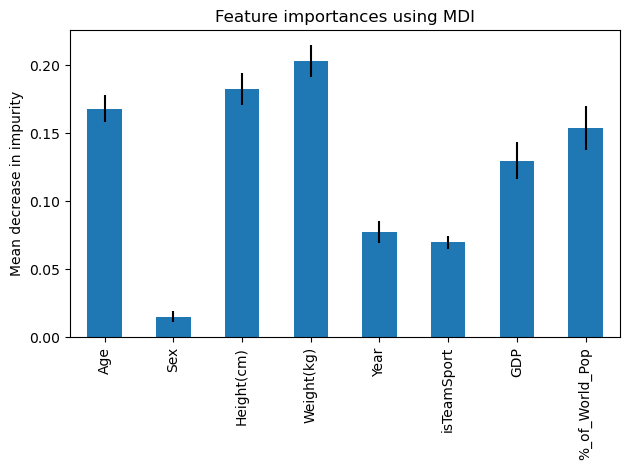

In [103]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [104]:
# Define the input data for a new athlete to predict which medal_category, if any, they will win
new_athlete_data = pd.DataFrame({'Age': [21], 'Sex': ['1'], 'Height(cm)': [200], 'Weight(kg)': [100],
                                'Year':[1992], 'isTeamSport':[0], 'GDP':[630916000000], '%_of_World_Pop':[.05]})

In [105]:
# Use the trained model to predict the medal category for the new athlete
prediction = rf.predict(new_athlete_data)

# Print the predicted medal category
print(f"Medal prediction for new athlete: {prediction}")

Medal prediction for new athlete: [0]
